In [57]:
!pip install pandas numpy matplotlib tensorflow scikit-learn
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler



  Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

In [59]:
df=pd.read_csv("/Users/abbychen/Downloads/NSE-Tata-Global.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [60]:
#converts Date column to DateTime objects (time-series analysis)
df["Date"]= pd.to_datetime(df.Date, format = "%Y-%m-%d")
df.index = df["Date"]
# .index - returns the index of the first occurrence of the element you're searching for

Text(0, 0.5, 'Daily Closing Prices')

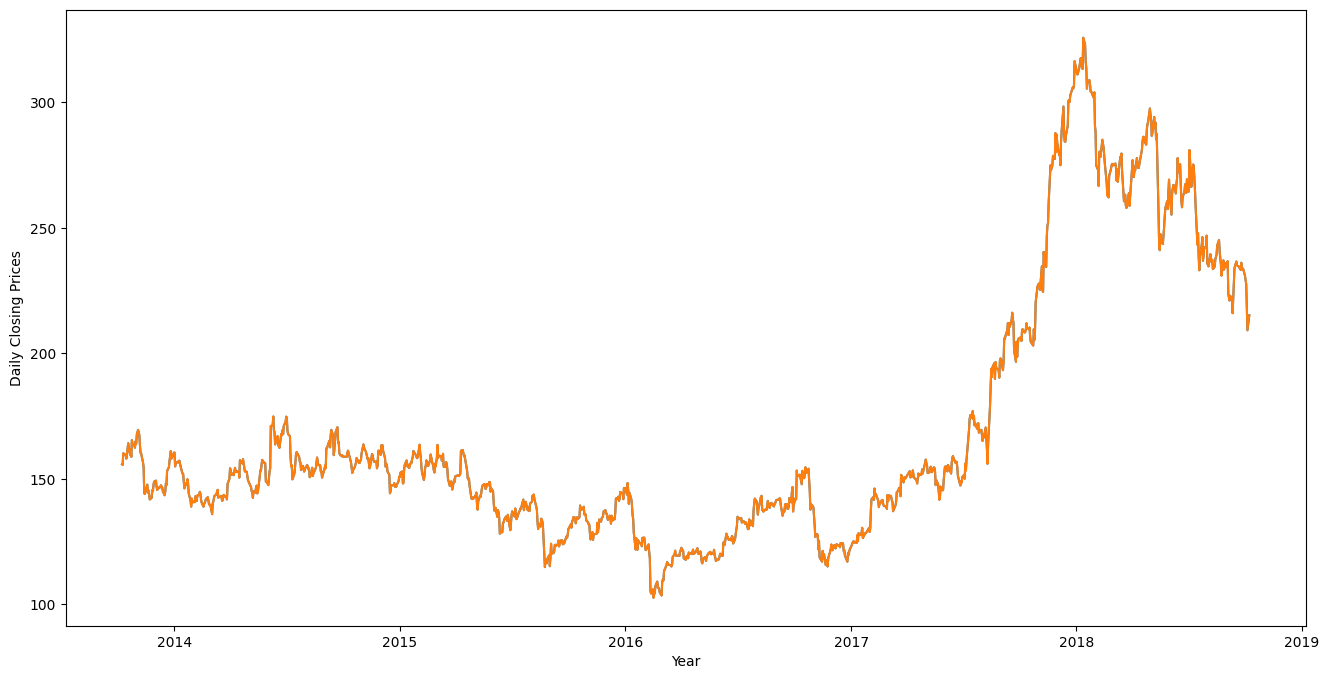

In [61]:
#creates a plot for 'Close' daily closing price history 
plt.figure(figsize=(16,8)) #size
plt.plot(df["Close"],label='Close Price history') 
x = df.index
y = df["Close"]
plt.plot(x,y)
plt.xlabel("Year")
plt.ylabel("Daily Closing Prices")



In [62]:
#interpret: increased in 2018, reached highest closing price than declined 

In [63]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2018-10-08 to 2013-10-08
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1235 non-null   datetime64[ns]
 1   Open                  1235 non-null   float64       
 2   High                  1235 non-null   float64       
 3   Low                   1235 non-null   float64       
 4   Last                  1235 non-null   float64       
 5   Close                 1235 non-null   float64       
 6   Total Trade Quantity  1235 non-null   float64       
 7   Turnover (Lacs)       1235 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 86.8 KB
None


In [64]:
print(df.describe()) 
#count - number of observations
#mean - avg value
#std - "spread",  higher: data points are more spread out from the mean
#min - lowest value
#25% - avg of ___ or lower (75% ____ or higher)

                                Date         Open         High          Low  \
count                           1235  1235.000000  1235.000000  1235.000000   
mean   2016-04-08 15:39:47.368421120   168.954858   171.429069   166.402308   
min              2013-10-08 00:00:00   103.000000   104.600000   100.000000   
25%              2015-01-10 12:00:00   137.550000   138.925000   135.250000   
50%              2016-04-11 00:00:00   151.500000   153.250000   149.500000   
75%              2017-07-10 12:00:00   169.000000   172.325000   166.700000   
max              2018-10-08 00:00:00   327.700000   328.750000   321.650000   
std                              NaN    51.499145    52.436761    50.542919   

              Last        Close  Total Trade Quantity  Turnover (Lacs)  
count  1235.000000  1235.000000          1.235000e+03      1235.000000  
mean    168.736356   168.731053          2.604151e+06      4843.166502  
min     102.600000   102.650000          1.001800e+05       128.04000

In [65]:
data = df.sort_index(ascending=True, axis=0) #Sort the data by index
new_dataset = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close']) #Create an empty dataframe with same number of rows

for i in range(0, len(data)): #Fill new dataFrame w just 'Date' and 'Close' values
    new_dataset.loc[i, "Date"] = data["Date"].iloc[i]
    new_dataset.loc[i, "Close"] = data["Close"].iloc[i]

In [71]:
# Make sure necessary imports are done
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Now get the numerical values
# Drop Date column first
final_dataset = new_dataset.drop("Date", axis=1)

# Scale only numerical data
scaled_data = scaler.fit_transform(final_dataset)

# Scale
scaler = MinMaxScaler(feature_range=(0, 1))


# Split train/valid
train_data = scaled_data[0:987, :]
valid_data = scaled_data[987:, :]

# Create sequences
x_train_data, y_train_data = [], []
for i in range(60, len(train_data)):
    x_train_data.append(train_data[i - 60:i, 0])
    y_train_data.append(train_data[i, 0])

x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

# Build model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

# Prepare inputs for prediction
inputs_data = scaled_data[len(scaled_data) - len(valid_data) - 60:]
inputs_data = inputs_data.reshape(-1, 1)

# Compile and train
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(x_train_data, y_train_data, epochs=1, batch_size=1, verbose=2)


/Users/abbychen/tf_env/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



927/927 - 12s - 13ms/step - loss: 0.0011


In [72]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
lstm_model.save("saved_model.h5")

In [ ]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

# Build the dashboard using Plotly dash

In [74]:
import dash
from dash import dcc, html
import pandas as pd
import plotly.graph_objs as go
from dash.dependencies import Input, Output
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import numpy as np

app = dash.Dash()
server = app.server

scaler = MinMaxScaler(feature_range=(0, 1))

df_nse = pd.read_csv("/Users/abbychen/Downloads/Stock-Price-Prediction-Project-Code/NSE-TATAGLOBAL.csv")
df_nse["Date"] = pd.to_datetime(df_nse["Date"], format="%Y-%m-%d")
df_nse.index = df_nse["Date"]

data = df_nse.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0, len(df_nse)), columns=["Date", "Close"])

for i in range(0, len(data)):
    new_data.loc[i, "Date"] = data.loc[data.index[i], "Date"]
    new_data.loc[i, "Close"] = data.loc[data.index[i], "Close"]

new_data.index = new_data["Date"]
new_data.drop("Date", axis=1, inplace=True)

dataset = new_data.values
train = dataset[0:987, :]
valid = dataset[987:, :]

scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60, len(train)):
    x_train.append(scaled_data[i - 60:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = load_model("saved_model.h5")

inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

train = new_data[:987]
valid = new_data[987:].copy()
valid["Predictions"] = closing_price

df = pd.read_csv("/Users/abbychen/Downloads/Stock-Price-Prediction-Project-Code/stock_data.csv")

app.layout = html.Div([
    html.H1("Stock Price Analysis Dashboard", style={"textAlign": "center"}),

    dcc.Tabs(id="tabs", children=[
        dcc.Tab(label='NSE-TATAGLOBAL Stock Data', children=[
            html.Div([
                html.H2("Actual closing price", style={"textAlign": "center"}),
                dcc.Graph(
                    id="Actual Data",
                    figure={
                        "data": [
                            go.Scatter(
                                x=train.index,
                                y=valid["Close"],
                                mode='markers'
                            )
                        ],
                        "layout": go.Layout(
                            title='scatter plot',
                            xaxis={'title': 'Date'},
                            yaxis={'title': 'Closing Rate'}
                        )
                    }
                ),
                html.H2("LSTM Predicted closing price", style={"textAlign": "center"}),
                dcc.Graph(
                    id="Predicted Data",
                    figure={
                        "data": [
                            go.Scatter(
                                x=valid.index,
                                y=valid["Predictions"],
                                mode='markers'
                            )
                        ],
                        "layout": go.Layout(
                            title='scatter plot',
                            xaxis={'title': 'Date'},
                            yaxis={'title': 'Closing Rate'}
                        )
                    }
                )
            ])
        ]),
        dcc.Tab(label='Facebook Stock Data', children=[
            html.Div([
                html.H1("Facebook Stocks High vs Lows", style={'textAlign': 'center'}),
                dcc.Dropdown(id='my-dropdown',
                             options=[
                                 {'label': 'Tesla', 'value': 'TSLA'},
                                 {'label': 'Apple', 'value': 'AAPL'},
                                 {'label': 'Facebook', 'value': 'FB'},
                                 {'label': 'Microsoft', 'value': 'MSFT'}
                             ],
                             multi=True,
                             value=['FB'],
                             style={"margin": "auto", "width": "60%"}),
                dcc.Graph(id='highlow'),

                html.H1("Facebook Market Volume", style={'textAlign': 'center'}),
                dcc.Dropdown(id='my-dropdown2',
                             options=[
                                 {'label': 'Tesla', 'value': 'TSLA'},
                                 {'label': 'Apple', 'value': 'AAPL'},
                                 {'label': 'Facebook', 'value': 'FB'},
                                 {'label': 'Microsoft', 'value': 'MSFT'}
                             ],
                             multi=True,
                             value=['FB'],
                             style={"margin": "auto", "width": "60%"}),
                dcc.Graph(id='volume')
            ], className="container")
        ])
    ])
])

@app.callback(Output('highlow', 'figure'),
              [Input('my-dropdown', 'value')])
def update_graph(selected_dropdown):
    dropdown = {"TSLA": "Tesla", "AAPL": "Apple", "FB": "Facebook", "MSFT": "Microsoft"}
    trace1 = []
    trace2 = []
    for stock in selected_dropdown:
        trace1.append(
            go.Scatter(x=df[df["Stock"] == stock]["Date"],
                       y=df[df["Stock"] == stock]["High"],
                       mode='lines', opacity=0.7,
                       name=f'High {dropdown[stock]}'))
        trace2.append(
            go.Scatter(x=df[df["Stock"] == stock]["Date"],
                       y=df[df["Stock"] == stock]["Low"],
                       mode='lines', opacity=0.6,
                       name=f'Low {dropdown[stock]}'))
    data = trace1 + trace2
    figure = {
        'data': data,
        'layout': go.Layout(
            colorway=["#5E0DAC", '#FF4F00', '#375CB1', '#FF7400', '#FFF400', '#FF0056'],
            height=600,
            title=f"High and Low Prices for {', '.join(dropdown[i] for i in selected_dropdown)} Over Time",
            xaxis={"title": "Date",
                   'rangeselector': {'buttons': [
                       {'count': 1, 'label': '1M', 'step': 'month', 'stepmode': 'backward'},
                       {'count': 6, 'label': '6M', 'step': 'month', 'stepmode': 'backward'},
                       {'step': 'all'}
                   ]},
                   'rangeslider': {'visible': True}, 'type': 'date'},
            yaxis={"title": "Price (USD)"}
        )
    }
    return figure

@app.callback(Output('volume', 'figure'),
              [Input('my-dropdown2', 'value')])
def update_graph_volume(selected_dropdown_value):
    dropdown = {"TSLA": "Tesla", "AAPL": "Apple", "FB": "Facebook", "MSFT": "Microsoft"}
    trace1 = []
    for stock in selected_dropdown_value:
        trace1.append(
            go.Scatter(x=df[df["Stock"] == stock]["Date"],
                       y=df[df["Stock"] == stock]["Volume"],
                       mode='lines', opacity=0.7,
                       name=f'Volume {dropdown[stock]}'))
    data = trace1
    figure = {
        'data': data,
        'layout': go.Layout(
            colorway=["#5E0DAC", '#FF4F00', '#375CB1', '#FF7400', '#FFF400', '#FF0056'],
            height=600,
            title=f"Market Volume for {', '.join(dropdown[i] for i in selected_dropdown_value)} Over Time",
            xaxis={"title": "Date",
                   'rangeselector': {'buttons': [
                       {'count': 1, 'label': '1M', 'step': 'month', 'stepmode': 'backward'},
                       {'count': 6, 'label': '6M', 'step': 'month', 'stepmode': 'backward'},
                       {'step': 'all'}
                   ]},
                   'rangeslider': {'visible': True}, 'type': 'date'},
            yaxis={"title": "Transactions Volume"}
        )
    }
    return figure

if __name__ == '__main__':
    app.run(debug=True)


/Users/abbychen/tf_env/lib/python3.9/site-packages/pandas/core/indexes/base.py:7631: FutureWarning:

Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.



33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
